# 

In [57]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score, accuracy_score,  make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import seaborn as sns
import math
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.patches as patches

In [58]:
train_data = np.load('fashion_train.npy')
test_data = np.load('fashion_test.npy')

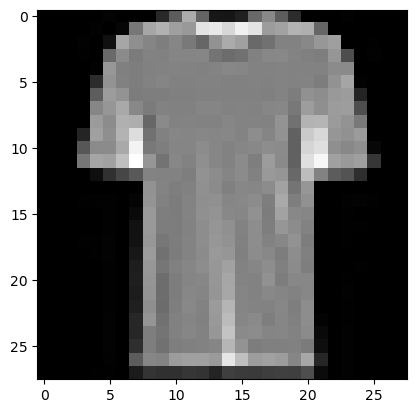

In [59]:
#first picture in the training data
curr_img = np.reshape(train_data[0][:-1], (28,28))
plt.imshow(curr_img, cmap=plt.cm.gray);

# PCA Dimensionality Reduction

> Below code for PCA is an implementation from DataCamp.com on 'Principal Component Analysis (PCA) in Python Tutorial'

In [60]:
train_df = pd.DataFrame(train_data)
class_mapping = {0:'Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Shirt'}
train_df.iloc[:,-1].replace(class_mapping, inplace=True)

In [61]:
x = train_df.loc[:, :783].values
x = preprocessing.StandardScaler().fit_transform(x)
x.shape

(10000, 784)

In [62]:
pca = decomposition.PCA()
pca_train = pca.fit_transform(x)

In [63]:
pc_labels = ['PC' + str(a) for a in range(1, len(pca_train[0])+1)]
pca_df = pd.DataFrame(pca_train, columns = pc_labels)

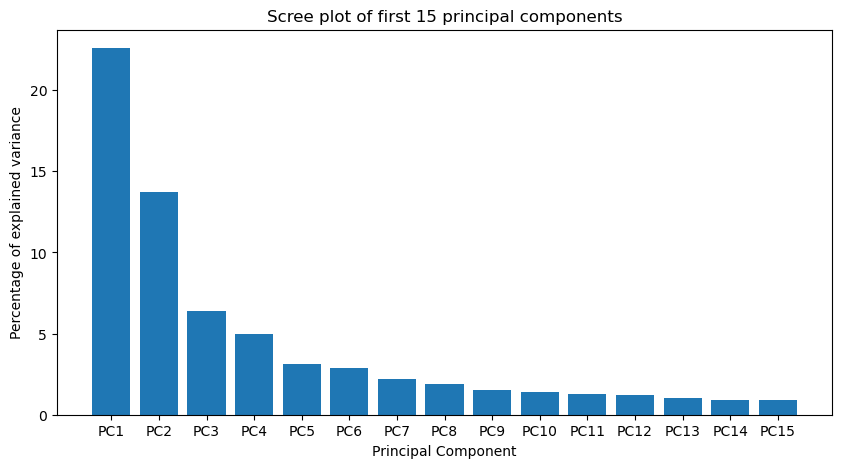

In [64]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
plt.figure(figsize=(10,5))
plt.bar(x=range(1, 16), height = per_var[:15], tick_label=pc_labels[:15])
plt.xlabel('Principal Component')
plt.ylabel('Percentage of explained variance')
plt.title('Scree plot of first 15 principal components')
plt.show()

In [65]:
print('Explained variation per first two principal components: {}'.format(per_var[0:2]))

Explained variation per first two principal components: [22.6 13.7]


<Figure size 640x480 with 0 Axes>

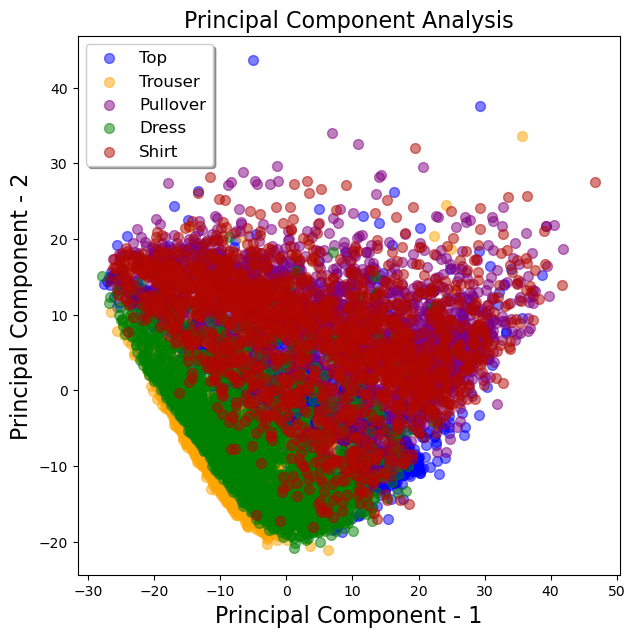

In [66]:
plt.figure()
plt.figure(figsize=(7,7))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Principal Component - 1',fontsize=16)
plt.ylabel('Principal Component - 2',fontsize=16)
plt.title("Principal Component Analysis",fontsize=16)
class_labels = ['Top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
colors = ['b', 'orange', 'purple', 'g', '#B10701']
for target, color in zip(class_labels,colors):
    indicesToKeep = train_df.iloc[:,-1] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'PC1']
               , pca_df.loc[indicesToKeep, 'PC2'], c = color, s = 50, alpha=0.5)

plt.legend(class_labels,prop={'size': 12}, shadow = True);

/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

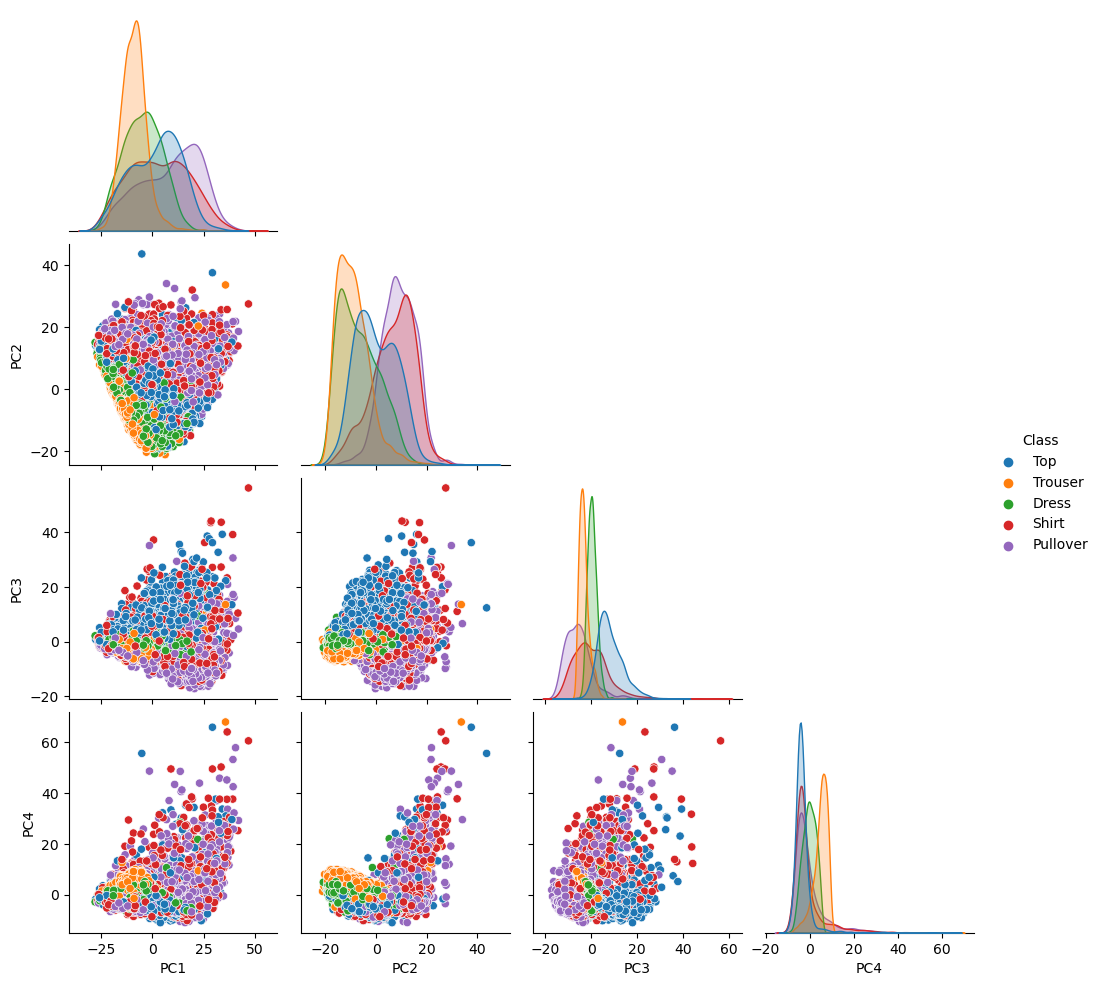

In [12]:
y = train_df.iloc[:,-1]

pca_4= pca_df.copy()
pca_4 = pca_4[['PC1','PC2','PC3','PC4']]
pca_4['Class'] = y

sns.pairplot(data=pca_4,hue='Class',corner=True)
plt.show()

In [67]:
pca_4 = pca_df.iloc[:, :4]
principal_components = pca_4.values

img_data = train_df.loc[:, :783].values

In [70]:
def show_images(selected_class, point1_coords, point2_coords):

    # Filter principal_components by class
    selected_class_indices = train_df[train_df.iloc[:, -1] == selected_class].index
    filtered_principal_components = principal_components[selected_class_indices]

    # Find the indices of the closest points to the specified coordinates in the filtered array
    distances1 = np.linalg.norm(filtered_principal_components - np.array([point1_coords]), axis=1)
    index1 = selected_class_indices[np.argmin(distances1)]
    selected_image1 = img_data[index1]

    distances2 = np.linalg.norm(filtered_principal_components - np.array([point2_coords]), axis=1)
    index2 = selected_class_indices[np.argmin(distances2)]
    selected_image2 = img_data[index2]

    # Visualize the selected images side by side
    if selected_image1 is not None and selected_image2 is not None:
        plt.figure(figsize=(8, 4))

        # Plot the first selected image
        plt.subplot(1, 2, 1)
        plt.imshow(selected_image1.reshape(28, 28), cmap='gray')
        plt.title(point1_coords)

        # Plot the second selected image
        plt.subplot(1, 2, 2)
        plt.imshow(selected_image2.reshape(28, 28), cmap='gray')
        plt.title(point2_coords)

        plt.show()


Two extremes of FIRST principal component for Shirts


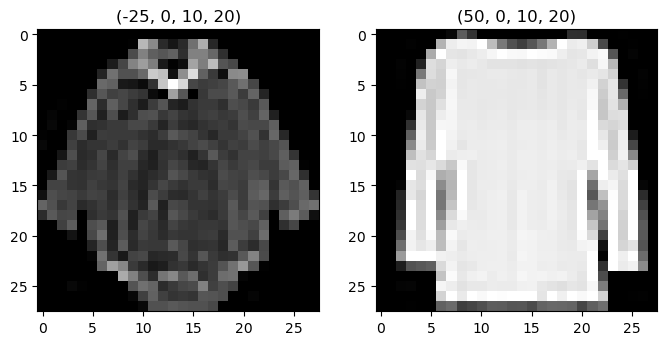

In [72]:
print('Two extremes of FIRST principal component for Shirts')
show_images('Shirt',(-25,0,10,20),(50,0,10,20))

Two extremes of FIRST principal component for Trouser


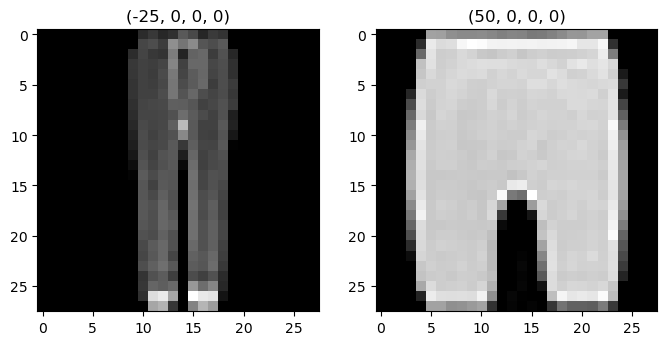

In [74]:
print('Two extremes of FIRST principal component for Trouser')
show_images('Trouser',(-25,0,0,0),(50,0,0,0))

Two extremes of SECOND principal component for SHIRT


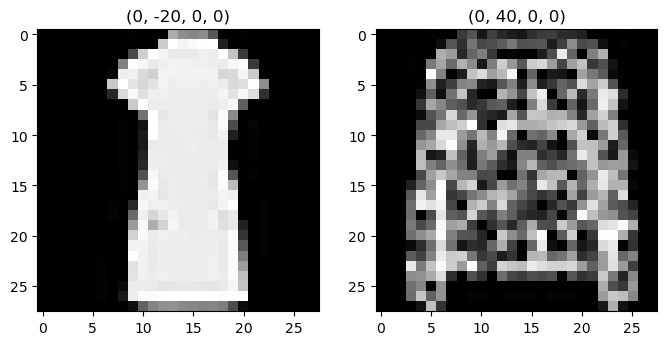

In [75]:
print('Two extremes of SECOND principal component for SHIRT')
show_images('Shirt',(0,-20,0,0),(0,40,0,0))

Two extremes of SECOND principal component for TROUSER


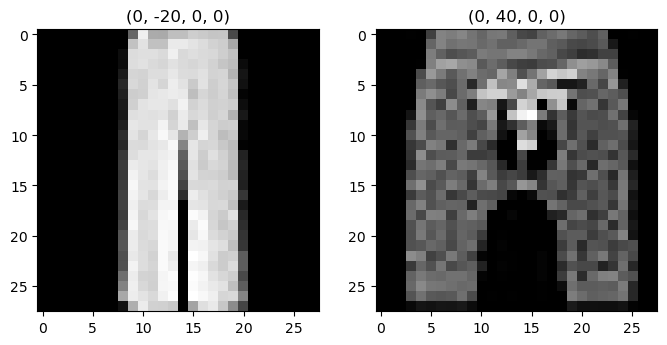

In [76]:
print('Two extremes of SECOND principal component for TROUSER')
show_images('Trouser',(0,-20,0,0),(0,40,0,0))


Two extremes of THIRD principal component for SHIRT


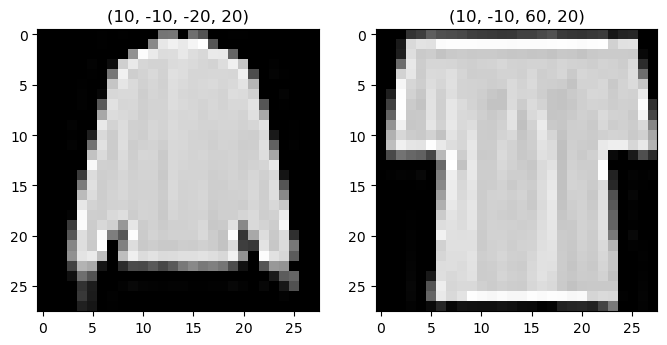

In [78]:
print('Two extremes of THIRD principal component for SHIRT')
show_images('Shirt',(10,-10,-20,20),(10,-10,60,20))

Two extremes of THIRD principal component for TROUSER


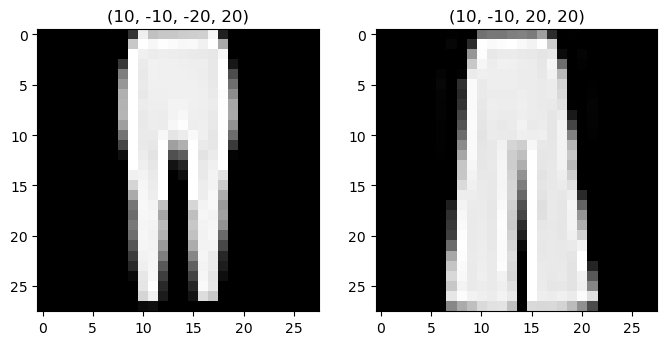

In [77]:
print('Two extremes of THIRD principal component for TROUSER')
show_images('Trouser',(10,-10,-20,20),(10,-10,20,20))

Two extremes of FOURTH principal component for SHIRT


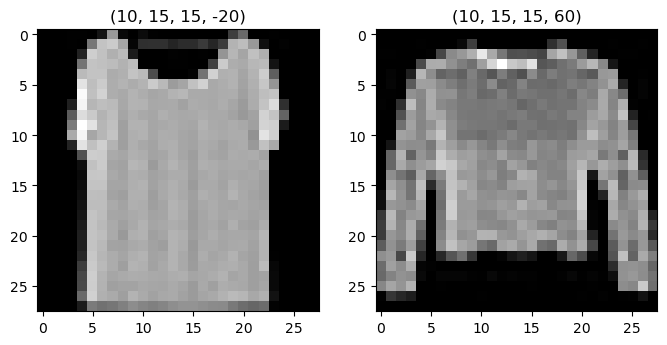

In [79]:
print('Two extremes of FOURTH principal component for SHIRT')
show_images('Shirt',(10,15,15,-20),(10,15,15,60))

Two extremes of FOURTH principal component for TROUSERS


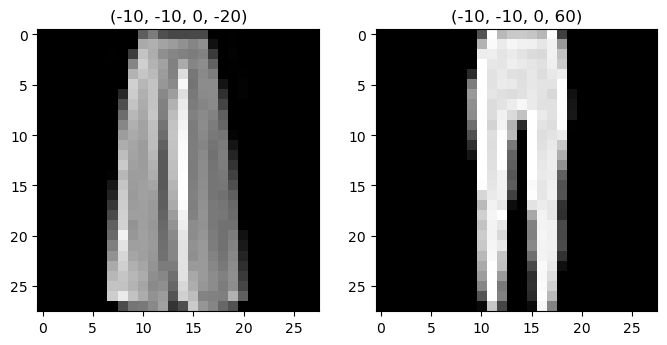

In [80]:
print('Two extremes of FOURTH principal component for TROUSERS')
show_images('Trouser',(-10,-10,0,-20),(-10,-10,0,60))

# LDA dimensionality reduction

> Using sklearn library for reference, if our code works properly

In [13]:
y = train_df.iloc[:,-1]
lda = LinearDiscriminantAnalysis()
lda_train = lda.fit_transform(x,y)

In [14]:
ld_labels = ['LD_var_' + str(a) for a in range(1, len(lda_train[0])+1)]
lda_df = pd.DataFrame(lda_train, columns = ld_labels)

In [15]:
lda_df

,LD_var_1,LD_var_2,LD_var_3,LD_var_4
0,-2.566698,0.556999,-1.853492,-1.649051
1,5.200266,-1.052919,-0.304277,0.403187
2,-1.947182,0.489225,-4.088625,-3.024362
3,-0.526337,1.277373,1.239752,0.239821
4,-0.848720,-0.492582,-0.640027,3.518901
...,...,...,...,...
9995,-2.378782,0.590585,-1.133377,0.246795
9996,-1.609139,0.184289,-1.507037,2.201470
9997,-0.220865,3.503316,1.788161,-0.217823
9998,-1.430544,0.892340,-1.819064,-1.694346


<Figure size 640x480 with 0 Axes>

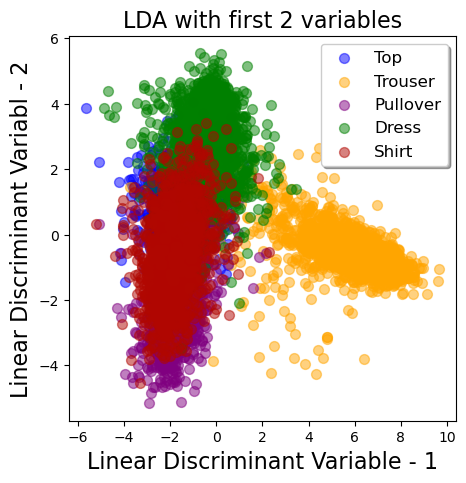

In [16]:
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Linear Discriminant Variable - 1',fontsize=16)
plt.ylabel('Linear Discriminant Variabl - 2',fontsize=16)
plt.title("LDA with first 2 variables",fontsize=16)
for target, color in zip(class_labels,colors):
    indicesToKeep = train_df.iloc[:,-1] == target
    plt.scatter(lda_df.loc[indicesToKeep, 'LD_var_1']
               , lda_df.loc[indicesToKeep, 'LD_var_2'], c = color, s = 50, alpha=0.5)

plt.legend(class_labels,prop={'size': 12}, shadow = True);

/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

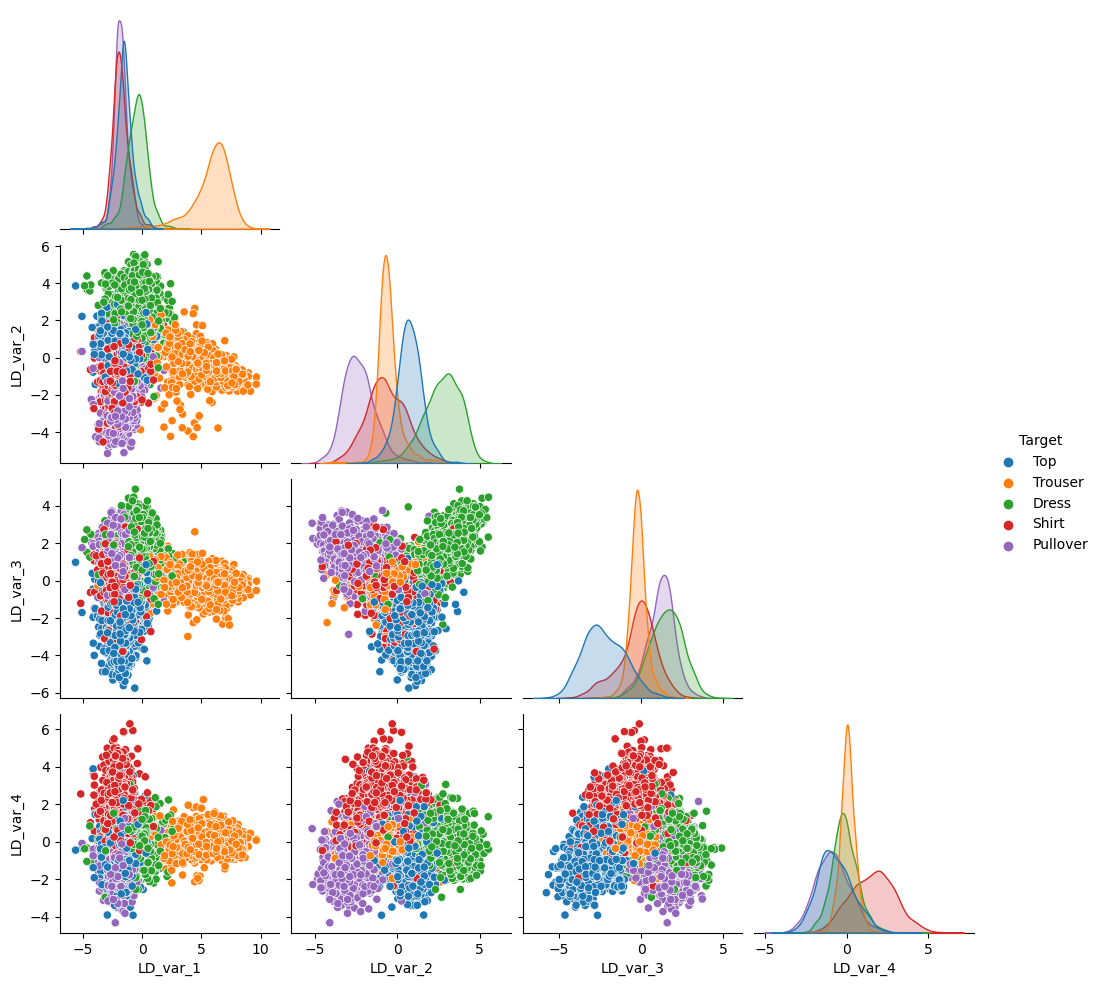

In [17]:
lda_pair = lda_df.copy()
lda_pair['Target'] = y
sns.pairplot(data=lda_pair, hue='Target', corner=True);

> Our own code

In [18]:
# MEAN VECTORS

X = train_data[:,:784]
num_classes = 5
mean_vectors = []

for i in range(num_classes):
    mean_vectors.append(np.mean(X[y==class_mapping[i]], axis=0))

mean_vectors_array = np.array(mean_vectors)

In [19]:
# WITHIN-CLASS SCATTER

num_features = len(mean_vectors[0])

within_class_scatter = np.zeros((num_features, num_features))
for c,m in zip(range(num_classes), mean_vectors):
    class_scatter = np.zeros((num_features,num_features))
    for x in X[y == class_labels[c]]:
        x,m = x.reshape(num_features,1), m.reshape(num_features,1)
        class_scatter += (x-m).dot((x-m).T)
    within_class_scatter += class_scatter

within_class_scatter.shape

(784, 784)

In [20]:
# BETWEEN CLASS SCATTER

total_mean = np.mean(X, axis=0)

between_class_scatter = np.zeros((num_features, num_features))

for i,mean_vec in enumerate(mean_vectors):  
    n = X[y== class_labels[i],:].shape[0]
    mean_vec = mean_vec.reshape(num_features,1) # make column vector
    total_mean = total_mean.reshape(num_features,1) # make column vector
    between_class_scatter += n * (mean_vec - total_mean).dot((mean_vec - total_mean).T)

between_class_scatter.shape

(784, 784)

In [21]:
# GET EIGENVALUES AND EIGENVECTORS

eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(within_class_scatter).dot(between_class_scatter))

for i in range(len(eigenvalues)):
    eigv = eigenvectors[:,i].reshape(num_features,1)

In [22]:
# List of tuples (eigenvalue,eigenvctor)
eigval_eigvec = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigval_eigvec = sorted(eigval_eigvec, key=lambda k: k[0], reverse=True)

total_eigenvalues = sum(eigenvalues)

print('First 4 eigenvalues')
for i in range(4):
    eigval = eigval_eigvec[i][0]
    print(f'Eigenvalue {i+1}: {round(eigval,4)}')

print('\nVariance explained:')
eigv_sum = sum(eigenvalues)
for i,j in enumerate(eigval_eigvec):
    if i<5:
        print('Eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))
    else:
        break

First 4 eigenvalues
Eigenvalue 1: 8.4004
Eigenvalue 2: 2.7822
Eigenvalue 3: 1.8046
Eigenvalue 4: 0.7584

Variance explained:
Eigenvalue 1: 61.11%
Eigenvalue 2: 20.24%
Eigenvalue 3: 13.13%
Eigenvalue 4: 5.52%
Eigenvalue 5: 0.00%


In [23]:
# chosing K eigenvectors
k =  min(num_features,num_classes-1)

# W matrix
k_eigenvectors = [eigval_eigvec[i][1].reshape(-1,1) for i in range(k)]
W = np.hstack(k_eigenvectors)
W.shape

(784, 4)

In [24]:
# LDA
X_LDA = X.dot(W)
X_LDA = X_LDA.real
X_LDA = pd.DataFrame(X_LDA, columns = ld_labels)

<Figure size 640x480 with 0 Axes>

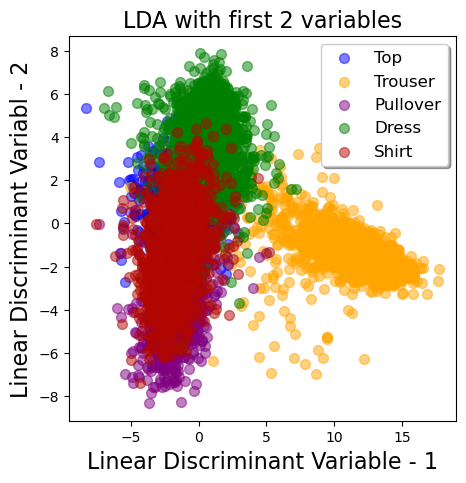

In [26]:
# PLOT FIRST 2 COMPONENTS

plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Linear Discriminant Variable - 1',fontsize=16)
plt.ylabel('Linear Discriminant Variabl - 2',fontsize=16)
plt.title("LDA with first 2 variables",fontsize=16)
for target, color in zip(class_labels,colors):
    indicesToKeep = train_df.iloc[:,-1] == target
    plt.scatter(X_LDA.loc[indicesToKeep, 'LD_var_1']
               , X_LDA.loc[indicesToKeep, 'LD_var_2'], c = color, s = 50, alpha=0.5)

plt.legend(class_labels,prop={'size': 12}, shadow = True);

# KNN

#### TRAIN/TEST DATA

In [27]:
# X_train_lda, X_test_lda, y_train, y_test

class_mapping = {'Top':0,'Trouser':1,'Pullover':2,'Dress':3,'Shirt':4}

X_train_lda = X_LDA.copy()
X_train_lda = X_train_lda.values

y_train = y.replace(class_mapping)
y_train = y_train.values
y_train = y_train.reshape(-1,1)

# LDA on TESTdata  
test_df = pd.DataFrame(test_data)

x_t = test_df.loc[:, :783].values
x_t = preprocessing.StandardScaler().fit_transform(x_t)

lda_test = lda.transform(x_t)
lda_t_df = pd.DataFrame(lda_test, columns = ld_labels)
X_test_lda = lda_t_df.copy()
X_test_lda = X_test_lda.values

y_test = test_df.iloc[:,-1]
y_test = y_test.values
y_test = y_test.reshape(-1,1)

#### 2 LDA VAR

In [28]:
X_train_2lda = np.delete(X_train_lda, [2,3], axis=1)
X_test_2lda = np.delete(X_test_lda, [2,3], axis=1)

In [29]:
# CROSS VALIDATION FOR SELECTING K

metrics = {'Accuracy: ': accuracy_score}
classifiers = { "Knn 1": KNN(1), "Knn 3": KNN(3), "Knn 5": KNN(5), "Knn 9": KNN(9)}


def cross_validate_classifiers(classifiers, X_train, y_train, metrics):
    results = {}

    for clf in classifiers.keys():
        clf_results = {}

        for metric in metrics.keys():
            scores = cross_val_score(classifiers[clf], X_train, y_train, cv=5)
            clf_results[metric] = scores.mean()

        results[clf] = clf_results
    return results



In [30]:
results_2LD = cross_validate_classifiers(classifiers,X_train_2lda,y_train.ravel(), metrics)
results_2LD_df = pd.DataFrame(results_2LD)

In [31]:
results_2LD_df

,Knn 1,Knn 3,Knn 5,Knn 9
Accuracy:,0.6936,0.7394,0.7538,0.7665


In [32]:
#EVALUATION ON TEST DATA 

k= 9
knn_classifier_2LD = KNN(k)
knn_classifier_2LD = knn_classifier_2LD.fit(X_train_2lda,y_train.ravel())

y_pred_2LD = knn_classifier_2LD.predict(X_test_2lda)
#F1 = round(f1_score(y_test ,y_pred),4)
Accuracy = round(accuracy_score(y_test ,y_pred_2LD),4)
print(f'KNN {k} neighbors. Accuracy score: {Accuracy}')

KNN 9 neighbors. Accuracy score: 0.6276


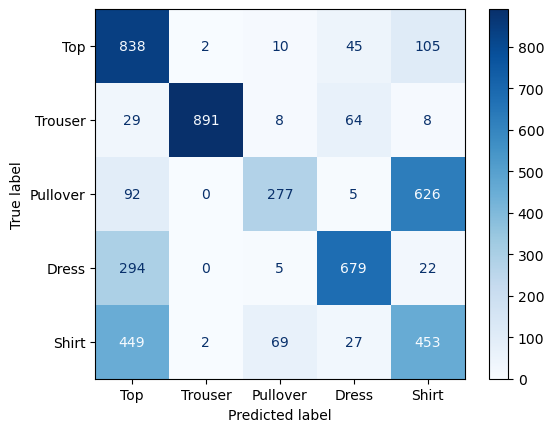

In [33]:
disp_2LD = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test,y_pred_2LD), display_labels=class_labels)
disp_2LD.plot(cmap='Blues');

In [34]:
# DOUBLE CHECK WITH LDA FROM LIBRARY (NOT OUR CODE)

lda2 = lda_df.values
lda2 = np.delete(lda2, [2,3], axis=1)

#EVALUATION ON TEST DATA 

k= 9
knn_classifier_ = KNN(k)
knn_classifier_ = knn_classifier_.fit(lda2,y_train.ravel())

y_pred_ = knn_classifier_.predict(X_test_2lda)
Accuracy = round(accuracy_score(y_test ,y_pred_),4)
print(f'KNN {k} neighbors. Accuracy score: {Accuracy}')

KNN 9 neighbors. Accuracy score: 0.719


#### 3 LDA VAR

In [35]:
X_train_3lda = np.delete(X_train_lda, [3], axis=1)
X_test_3lda = np.delete(X_test_lda, [3], axis=1)

In [36]:
results_3lda = cross_validate_classifiers(classifiers,X_train_3lda,y_train.ravel(), metrics)
resultsdf_3lda = pd.DataFrame(results_3lda)

In [37]:
resultsdf_3lda

,Knn 1,Knn 3,Knn 5,Knn 9
Accuracy:,0.7632,0.7974,0.8107,0.819


In [38]:
#EVALUATION ON TEST DATA 

k= 9
knn_classifier_3ld = KNN(k)
knn_classifier_3ld = knn_classifier_3ld.fit(X_train_3lda,y_train.ravel())

y_pred_3ld = knn_classifier_3ld.predict(X_test_3lda)
Accuracy = round(accuracy_score(y_test ,y_pred_3ld),4)
print(f'KNN {k} neighbors. Accuracy score: {Accuracy}')

KNN 9 neighbors. Accuracy score: 0.7268


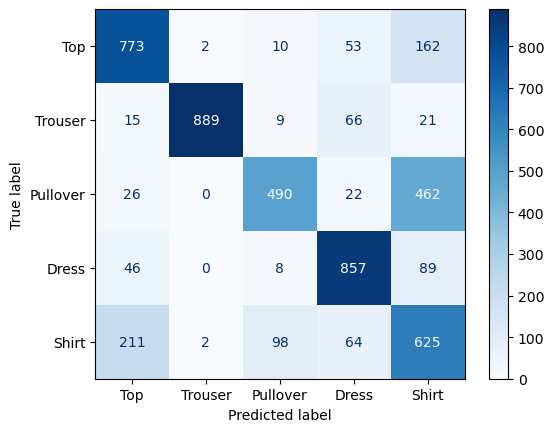

In [39]:
disp_3ld = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test,y_pred_3ld), display_labels=class_labels)
disp_3ld.plot(cmap='Blues');

#### FULL 4 LDA VAR

In [40]:
results_full = cross_validate_classifiers(classifiers,X_train_lda,y_train.ravel(), metrics)
resultsdf_full = pd.DataFrame(results_full)

In [41]:
resultsdf_full

,Knn 1,Knn 3,Knn 5,Knn 9
Accuracy:,0.8221,0.853,0.8607,0.8697


In [42]:
#EVALUATION ON TEST DATA 

k= 9
knn_classifier_full = KNN(k)
knn_classifier_full = knn_classifier_full.fit(X_train_lda,y_train.ravel())

y_pred_full = knn_classifier_full.predict(X_test_lda)
Accuracy = round(accuracy_score(y_test ,y_pred_full),4)
print(f'KNN {k} neighbors. Accuracy score: {Accuracy}')

KNN 9 neighbors. Accuracy score: 0.6422


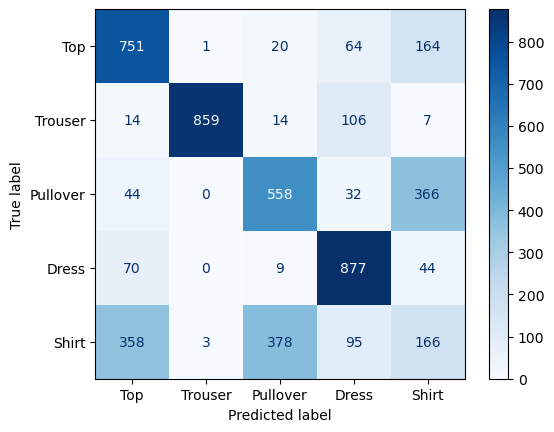

In [43]:
disp_full = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test,y_pred_full), display_labels=class_labels)
disp_full.plot(cmap='Blues');

# CNN

In [44]:
train_df = pd.DataFrame(train_data)
x_train = train_df.loc[:, :783].values #train_images
y_train = train_df.iloc[:,-1] #train_labels

test_df = pd.DataFrame(test_data)
x_test = test_df.loc[:, :783].values #test_images
y_test = test_df.iloc[:,-1] #test_labels

In [45]:
#reshapeing the dimention of the data so it matches the requirements
x_train = np.array(x_train).reshape((x_train.shape[0], 28, 28, 1))
x_test = np.array(x_test).reshape((x_test.shape[0], 28, 28, 1))

In [46]:
# Normalizing pixel values to be between 0 and 1
# train_data already normalised

x_train, x_test = x_train / 255.0, x_test / 255.0

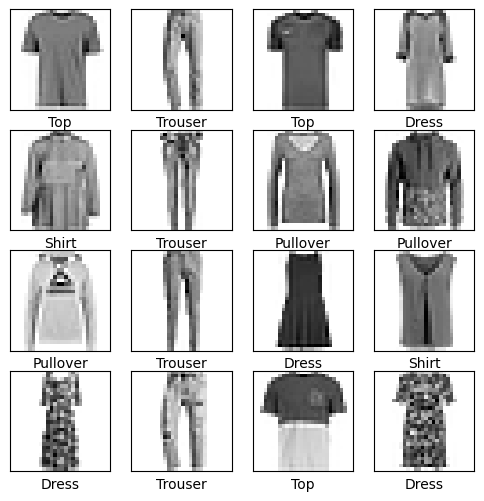

In [47]:
#visualising example images
def show():
    plt.figure(figsize=(6,6))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i], cmap=plt.cm.binary)
        plt.xlabel(class_labels[y_train[i]])
    plt.show()

show()

In [48]:
#defining CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

What can we see?

- Output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels)

- width and height dimensions show tendency of getting smaller as you go deeper in the network

In [50]:
# for classificatio we use fully connected layer (FN/dense layer) 
model.add(layers.Flatten()) #falttening the image 
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(5))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [52]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.08301158, -0.05064986,  0.05768029, -0.0406961 , -0.00066483]],
      dtype=float32)

The network summary shows that (3, 3, 56) outputs were flattened into vectors of shape (504) before going through two Dense layers.

### Compiling and training the model

In [53]:
#softmax activation function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_test, y_test))

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6652 - accuracy: 0.7222 - val_loss: 0.5732 - val_accuracy: 0.7900
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.4314 - accuracy: 0.8326 - val_loss: 0.4724 - val_accuracy: 0.8222
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.3718 - accuracy: 0.8602 - val_loss: 0.4073 - val_accuracy: 0.8472
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.3374 - accuracy: 0.8711 - val_loss: 0.3564 - val_accuracy: 0.8678
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.3029 - accuracy: 0.8818 - val_loss: 0.3821 - val_accuracy: 0.8574
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.2820 - accuracy: 0.8910 - val_loss: 0.3550 - val_accuracy: 0.8672
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.2591 - accuracy: 0.8985 - val_loss: 0.3407 - val_accuracy:

KeyboardInterrupt: 

157/157 - 1s - loss: 1.6310 - accuracy: 0.8746 - 537ms/epoch - 3ms/step


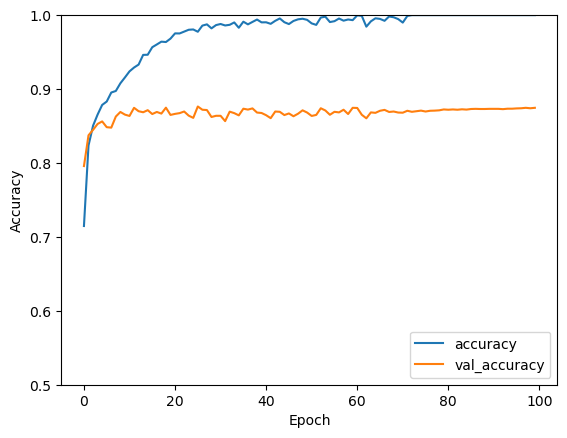

In [ ]:
#model evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
print(test_acc)

0.8745999932289124


# Naive Bayes

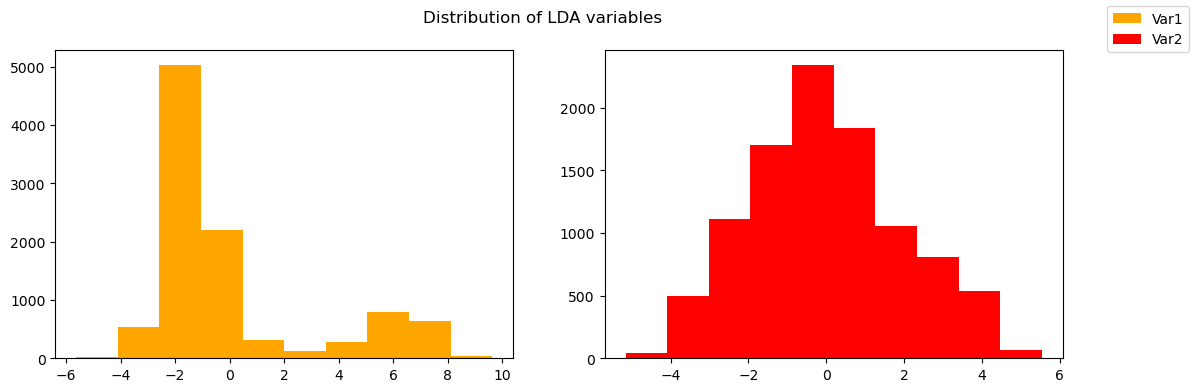

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols =2, figsize = (13,4))

ax[0].hist(lda_pair.iloc[:,0], color = 'orange', label = 'Var1')
ax[1].hist(lda_pair.iloc[:,1], color = 'red', label = 'Var2')
#ax[2].hist(lda_pair.iloc[:,2], color = 'purple', label='Var3')
#ax[3].hist(lda_pair.iloc[:,3], label = 'Var4')
fig.legend()
fig.suptitle('Distribution of LDA variables');

In [ ]:
#LDA on test
test_df = pd.DataFrame(test_data)
class_mapping = {0:'Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Shirt'}
test_df.iloc[:,-1].replace(class_mapping, inplace=True)

x_t = test_df.loc[:, :783].values
x_t = preprocessing.StandardScaler().fit_transform(x_t)
y_t = test_df.iloc[:,-1]
lda_test = lda.transform(x_t)
lda_t_df = pd.DataFrame(lda_test, columns = ld_labels)
lda_pair_test = lda_t_df.copy()
lda_pair_test['Target'] = y_t

In [ ]:
def class_divider(data):
    targets = list(data['Target'].unique())
    classes = {}

    for t in targets:
        classes[t] = data[(data['Target']==t)]

    return classes

In [ ]:
def prior_probabilities(data):
    #Dictionary with each class and corresponding class prior

    prior = data['Target'].value_counts()
    targets = list(data['Target'].unique())
    prior_p = {}

    for i,t in enumerate(targets):
        prior_p[t] = prior[i]/len(data['Target'])
    
    return prior_p    

In [ ]:
def estimate_pdf(classes): 
    ''' This function estimates the pdf of each feature for each class,nby spliting the 
    range of x into diferent bins, and mapping those bins to a corresponding 
    density'''

    classes_pdf = {}

    for t in classes.keys():
        classes_pdf[t] = {}

        for v in range(classes[t].shape[1]-1):
            np_data = np.array(classes[t].iloc[:,v])
            min_value = np_data.min()
            max_value = np_data.max()

            # Calculate bin width using Scott's Rule
            n_data = len(np_data)
            std_dev = np_data.std()
            h = 3.5 * std_dev / (n_data ** (1/3))

            bins = np.arange(min_value,max_value+2,h)

            counts, bin_edges = np.histogram(np_data, bins=bins)
            n = sum(counts)
            epsilon = 1e-10  # Small constant to avoid division by zero
            normalized_counts = counts / (n * h + epsilon)
            classes_pdf[t][v] = [normalized_counts, bin_edges]

    return classes_pdf

In [ ]:
def calculate_conditional(x, pdf):

    normalized_counts, bin_edges = pdf[0], pdf[1]
    index = np.searchsorted(bin_edges[:-1], x)

    p = normalized_counts[index-1]

    return p

In [ ]:
def class_posterior(row, classes_pdf, prior_probs):
    probs = {}
    prior_p = prior_probs

    for t in class_labels:
        probs[t] = prior_p[t]
        for v in range(len(row)-1):
            x = row[v]
            pdf = classes_pdf[t][v]
            probs[t] *= calculate_conditional(x, pdf)
    
    prediction = max(probs, key=probs.get)
    
    return prediction, probs

In [ ]:
def accuracy_metric(actual, predicted):
    # Calculate overall accuracy
    overall_accuracy = sum(1 for a, p in zip(actual, predicted) if a == p) / len(actual) * 100.0

    # Calculate class-specific accuracies
    cm = confusion_matrix(actual, predicted)
    class_accuracies = {label: cm[i, i] / cm[i, :].sum() * 100.0 for i, label in enumerate(set(actual))}

    # Print overall accuracy
    print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")

    # Print class-specific accuracies
    print("\nClass-specific Accuracies:")
    for label, acc in class_accuracies.items():
        print(f"{label}:  {acc:.2f}%")

    return class_accuracies


In [ ]:
def NaiveBayes(train_data, test_data):
    predicted = []
    classes = class_divider(train_data)
    prior_p = prior_probabilities(train_data)
    classes_pdf = estimate_pdf(classes)
    for _,row in test_data.iterrows():
        prediction = class_posterior(row, classes_pdf, prior_p)[0]
        predicted.append(prediction)
    return predicted, classes, prior_p, classes_pdf

In [ ]:
final_train = lda_pair[['LD_var_1', 'LD_var_2', 'Target']]
final_test = lda_pair_test[['LD_var_1', 'LD_var_2', 'Target']]

In [ ]:
prediction = NaiveBayes(final_train, final_test)

print(accuracy_metric(y_t, prediction[0]))


Overall Accuracy: 72.50%

Class-specific Accuracies:
Top:  80.10%
Shirt:  74.30%
Trouser:  39.90%
Dress:  73.20%
Pullover:  95.00%
{'Top': 80.10000000000001, 'Shirt': 74.3, 'Trouser': 39.900000000000006, 'Dress': 73.2, 'Pullover': 95.0}


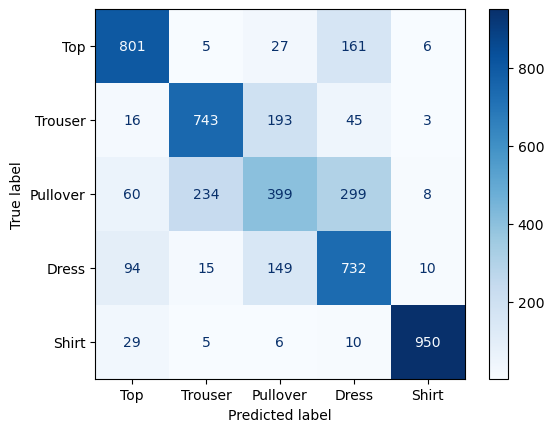

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_t,prediction[0]), display_labels=class_labels)
disp.plot(cmap='Blues');

In [ ]:
correlations_by_class = final_train.groupby('Target').apply(lambda x: x[['LD_var_1', 'LD_var_2']].corr().iloc[0, 1])

correlations_table = pd.DataFrame(correlations_by_class, columns=['Correlation'])
accuracy_dict = accuracy_metric(y_t, prediction[0])
correlations_table['Accuracy'] = correlations_table.index.map(accuracy_dict)
correlations_table



Overall Accuracy: 72.50%

Class-specific Accuracies:
Top:  80.10%
Shirt:  74.30%
Trouser:  39.90%
Dress:  73.20%
Pullover:  95.00%


,Correlation,Accuracy
Target,,
Dress,0.085041,73.2
Pullover,0.374024,95.0
Shirt,0.314111,74.3
Top,0.038135,80.1
Trouser,-0.534075,39.9


In [ ]:
#checking correctness of class divider
pred_classes = prediction[1]
for key in pred_classes:
    print(key, len(pred_classes[key]))

Top 2033
Trouser 1947
Dress 2005
Shirt 2014
Pullover 2001


In [ ]:
#checking correctness of prior probabilities
pred_prior_p = prediction[2]
pred_prior_p

{'Top': 0.2033,
 'Trouser': 0.2014,
 'Dress': 0.2005,
 'Shirt': 0.2001,
 'Pullover': 0.1947}

In [ ]:
#checking correctness of prediction of 'Trouser' item
pred_pdf = prediction[3]
one = class_posterior(final_test.iloc[0,:-1], pred_pdf, pred_prior_p)[1]
one

{'Top': 0.0,
 'Trouser': 0.0033157265530991105,
 'Pullover': 0.0,
 'Dress': 0.0011948764647033774,
 'Shirt': 0.0004922541321382332}

In [ ]:
final_test.iloc[0,:-1][0] #LD1 for first 'Trouser' in test data

1.6925379970660885

In [ ]:
pred_pdf['Trouser'][0] #pdf LD1
pred_one = calculate_conditional(final_test.iloc[0,:-1][0], pred_pdf['Trouser'][0])
pred_one

0.01646338904220015

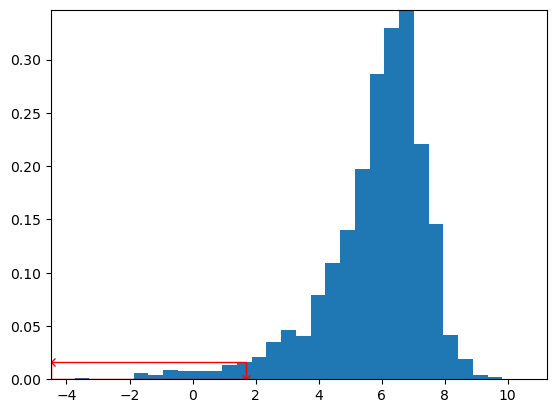

In [ ]:
#checking correctness of extracted pdf y-value
fig, ax = plt.subplots() 
ax.stairs(pred_pdf['Trouser'][0][0], pred_pdf['Trouser'][0][1], fill=True)
ax.margins(0,0)
rect = patches.Rectangle((-4.5,0), (4.5+final_test.iloc[0,:-1][0]), pred_one, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.plot(final_test.iloc[0,:-1][0], 0, marker ='x', color='r')
plt.plot(-4.5, pred_one, marker ='x', color='r');

### Class distribution plot

In [ ]:
train_df = pd.DataFrame(train_data)
train_df.iloc[:,-1].replace(class_mapping, inplace=True)

In [ ]:
# Unique classes and their counts
# in test set
unique_test, counts_test = np.unique(test_df.iloc[:,-1], return_counts=True)
# in train set
unique_train, counts_train = np.unique(train_df.iloc[:,-1], return_counts=True)
print("Unique classes and their counts:", dict(zip(unique_train, counts_train)))
print("Unique classes and their counts:", dict(zip(unique_test, counts_test)))

Unique classes and their counts: {'Dress': 2005, 'Pullover': 2001, 'Shirt': 2014, 'Top': 2033, 'Trouser': 1947}
Unique classes and their counts: {'Dress': 1000, 'Pullover': 1000, 'Shirt': 1000, 'Top': 1000, 'Trouser': 1000}


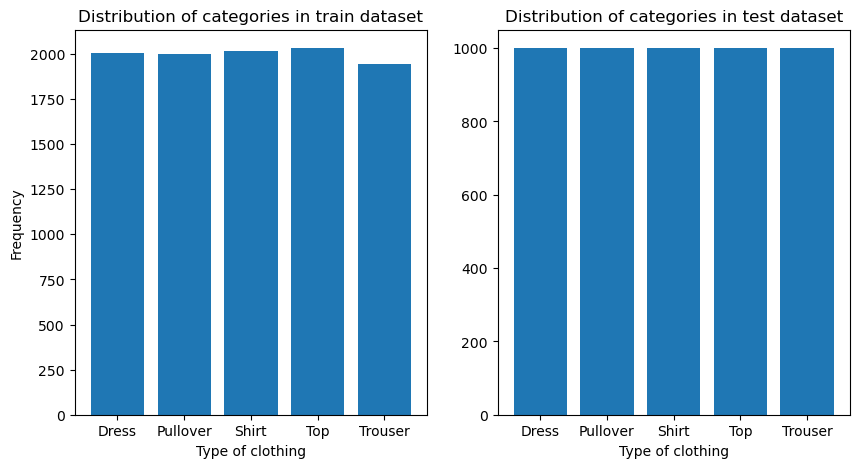

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
# Create the first subplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(unique_train, counts_train)
plt.xticks(unique_train)
plt.xlabel("Type of clothing")
plt.ylabel("Frequency")
plt.title("Distribution of categories in train dataset")
 
# Create the second subplot
plt.subplot(1, 2, 2)
plt.bar(unique_test, counts_test)
plt.xticks(unique_test)
plt.xlabel("Type of clothing")
# plt.ylabel("Frequency")
plt.title("Distribution of categories in test dataset")
plt.show()
 
# Display the plot
plt.show